In [10]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from random import random
import scipy.stats as st

In [17]:
#Q1 
#initial conditions
N=20; #grid size
J=1; #coupling strength
#create 2D array that has +-1 randomly assigned
spins=np.random.randint(-1, high=1, size=((N,N)), dtype='l');
for i,j in np.argwhere(spins == 0):
    spins[i,j]=spins[i,j]+1

In [18]:
def flip(spins,temp):

    #flip a random spin
    flippedspins = np.zeros((N,N))
    for i in range (N):
        for j in range (N):
            flippedspins[i,j]=spins[i,j];
    x=np.random.randint(0, high=N, dtype='l')
    y=np.random.randint(0, high=N, dtype='l')
    if flippedspins[x,y]==-1:
        flippedspins[x,y]+=2
    elif flippedspins[x,y]==+1:
        flippedspins[x,y]-=2        
        
    #determine wether to accept or reject flip
    
    up=np.roll(spins, -1, axis=0) #to multiply with nearest neighbors, multiply with arrays shifted by 1
    up[-1, :]=0 # don't want periodic boundary conditions
    down=np.roll(spins, 1, axis=0)
    down[0, :]=0
    left=np.roll(spins, -1, axis=1)
    left[:,-1]=0
    right=np.roll(spins, 1, axis=1)
    right[:,0]=0

    
    delE= -J*((flippedspins[x,y]-spins[x,y])*(up[x,y]+down[x,y]+right[x,y]+left[x,y]) )#energy difference between new and old configuration
    if np.random.uniform() < np.exp(-delE/temp):
        spins[x,y]=flippedspins[x,y]

    
    return spins

In [50]:
magnetization=[]
energytab=[]
steps=10000
spinsall=[]
spins=np.random.randint(-1, high=1, size=((N,N)), dtype='l');
for i,j in np.argwhere(spins == 0):
    spins[i,j]=spins[i,j]+1
while i < steps:
    urgh=flip(spins,4)
    spinsall.append(urgh) #this is where we save all spin arrays for plotting
   # energytab.append(energy(spins))
    magnetization.append(np.sum(urgh)) 
   # print (spins)
    i+=1
    

Text(0, 0.5, 'Magnetization')

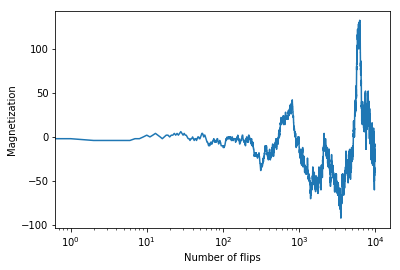

In [51]:
plt.semilogx(magnetization)
plt.xlabel("Number of flips")
plt.ylabel("Magnetization")

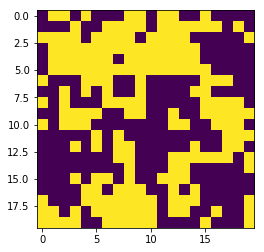

In [52]:
plt.imshow(spinsall[0])

In [59]:
#Q2
#Without cooling
size = 50
lattice = np.zeros((size,size))
T = 10
for i in range(10000):
    xa = np.random.randint(1,size-1)
    ya = np.random.randint(1,size-1)
    rx = np.random.randint(-1,2)
    ry = np.random.randint(-1,2)
    p = random()
    if (rx != 0 and ry ==0) or (rx ==0 and ry != 0):
        #print(rx,ry)
        if lattice[xa][ya] == 0 and lattice[xa+rx][ya+ry]==0:
            lattice[xa][ya]=i
            lattice[xa+rx][ya+ry]=i
        elif p < exp(-1/T): 
            if lattice[xa][ya] != 0 and lattice[xa+rx][ya+ry]==0:
                for k1 in range(-1,2):
                    for k2 in range(-1,2): 
                        if xa+k1 >= size or ya+k2 >=size or (k2==0 and k1==0):
                            continue
                        else:                                                        
                            if lattice[xa][ya] == lattice[xa+k1][ya+k2]:
                                cx = k1
                                cy = k2
                                #print("1")
                lattice[xa][ya]= i 
                lattice[xa+rx][ya+ry]=i
                lattice[xa+cx][ya+cy] = 0
            elif lattice[xa][ya] == 0 and lattice[xa+rx][ya+ry]!=0:
                for k1 in range(-1,2):
                    for k2 in range(-1,2): 
                        if xa+rx+k1 >= size or ya+ry+k2 >=size or (k2==0 and k1==0):
                            continue
                        else:                                                        
                            if lattice[xa+rx][ya+ry] == lattice[xa+rx+k1][ya+ry+k2]:
                                cx = k1
                                cy = k2
                                #print("1")
                lattice[xa][ya]= i 
                lattice[xa+rx][ya+ry]=i
                lattice[xa+rx+cx][ya+ry+cy] = 0

In [60]:
#draw graph
x=np.linspace(1,size,size)
y=np.linspace(1,size,size)
vx = []
vy = []
for i in range(1,size):
    for j in range(1,size):  
        if lattice[i][j] != 0:
            #print(i,j)
            for k1 in range(-1,2):
                for k2 in range(-1,2): 
                    if i+k1 >= size or j+k2 >=size or (k1==0 and k2==0):
                        continue
                    elif lattice[i][j] == lattice[i+k1][j+k2]:
                        #print(lattice[i][j],lattice[i+k1][j+k2])
                        vx.append(i)
                        vx.append(i+k1)
                        vy.append(j)
                        vy.append(j+k2)
                    #plt.plot(x[m1:m1+2], y[m2:m2+2], ',-')
        

no of edges 1936.0


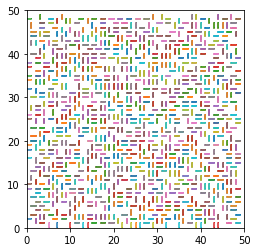

In [61]:
print("no of edges",len(vx)/2)
for i in range(0, len(vx), 2):
    #print(vx[i],vy[i])
    #print(vx[i:i+2])
    plt.plot(vx[i:i+2], vy[i:i+2], ',-')
    plt.xlim(0, size)
    plt.ylim(0, size)
    plt.gca().set_aspect('equal', adjustable='box')

In [100]:
#With Cooling
lattice = np.zeros((50,50))
Tmax = 100.0
Tmin = 1e-2
tau = 2*1e2
t = 0
T = Tmax
i = 0
while T>Tmin:
    # Cooling
    xa = np.random.randint(1,size-1)
    ya = np.random.randint(1,size-1)
    rx = np.random.randint(-1,2)
    ry = np.random.randint(-1,2)
    p = random()
    if (rx == 0 and ry != 0) or (ry == 0 and rx != 0):
        t += 1
        T = Tmax*exp(-t/tau)
        i += 1
        if lattice[xa][ya] == 0 and lattice[xa+rx][ya+ry]==0:
            lattice[xa][ya]=i
            lattice[xa+rx][ya+ry]=i
        elif p < exp(-1/T): 
            if lattice[xa][ya] != 0 and lattice[xa+rx][ya+ry]==0:
                for k1 in range(-1,2):
                    for k2 in range(-1,2): 
                        if xa+k1 >= size or ya+k2 >=size or (k2==0 and k1==0):
                            continue
                        else:                                                        
                            if lattice[xa][ya] == lattice[xa+k1][ya+k2]:
                                cx = k1
                                cy = k2
                                #print("1")
                lattice[xa][ya]= i 
                lattice[xa+rx][ya+ry]=i
                lattice[xa+cx][ya+cy] = 0
            elif lattice[xa][ya] == 0 and lattice[xa+rx][ya+ry]!=0:
                for k1 in range(-1,2):
                    for k2 in range(-1,2): 
                        if xa+rx+k1 >= size or ya+ry+k2 >=size or (k2==0 and k1==0):
                            continue
                        else:                                                        
                            if lattice[xa+rx][ya+ry] == lattice[xa+rx+k1][ya+ry+k2]:
                                cx = k1
                                cy = k2
                                #print("1")
                lattice[xa][ya]= i 
                lattice[xa+rx][ya+ry]=i
                lattice[xa+rx+cx][ya+ry+cy] = 0

In [101]:
print("no of steps for cooling",i)

no of steps for cooling 1843


no of edges 2958


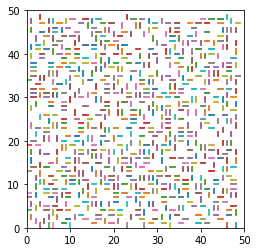

In [102]:
x=np.linspace(1,size,size)
y=np.linspace(1,size,size)
vx = []
vy = []
for i in range(1,size):
    for j in range(1,size):   
        if lattice[i][j] != 0:
            #print(i,j)
            for k1 in range(-1,2):
                for k2 in range(-1,2): 
                    if i+k1 >= size or j+k2 >=size or (k1==0 and k2==0):
                        continue
                    elif lattice[i][j] == lattice[i+k1][j+k2]:
                        #print(lattice[i][j],lattice[i+k1][j+k2])
                        vx.append(i)
                        vx.append(i+k1)
                        vy.append(j)
                        vy.append(j+k2)
                    #plt.plot(x[m1:m1+2], y[m2:m2+2], ',-')
        
print('no of edges',len(vx))
for i in range(0, len(vx), 2):
    #print(vx[i],vy[i])
    #print(vx[i:i+2])
    plt.plot(vx[i:i+2], vy[i:i+2], ',-')
    plt.xlim(0, size)
    plt.ylim(0, size)
    plt.gca().set_aspect('equal', adjustable='box')

In [103]:
len(vx)/4

739.5

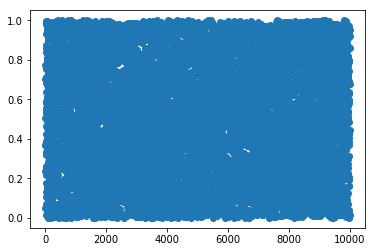

In [4]:
#Q3
#linear congruential random number generator
N=10000
# values from Neumann
a=1664525
c=1013904223
m=4294967296
x=1
results=[]
for i in range(N):
    x=(a*x+c)%m
    results.append(x/m)
    
plt.plot(results,"o")

#generate random numbers from G(0,1)

sigma=1

gauss=[]
for i in range(N-1):
    r=np.sqrt(-2*sigma**2*np.log(1-results[i]))
    theta=2*np.pi*results[i+1]
    x=r*np.cos(theta)
    y=r*np.sin(theta)
    
    gauss.append(x)
    gauss.append(y)





Text(0, 0.5, 'Random number')

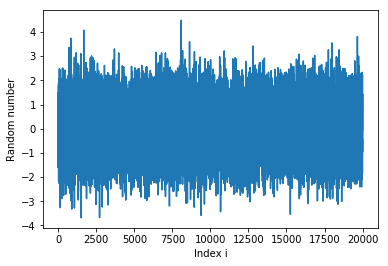

In [5]:
plt.plot(gauss)
plt.xlabel("Index i")
plt.ylabel("Random number")

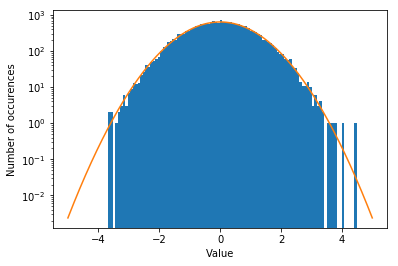

In [11]:
x = np.linspace(-5, 5, 1000)
y = 1600*st.norm.pdf(x,0,1)

#this is the histogram

plt.yscale('log')
plt.hist(gauss,100)

plt.xlabel("Value")
plt.ylabel("Number of occurences")

plt.plot(x,y)

Text(0, 0.5, 'Power spectrum')

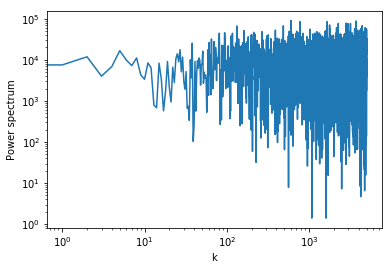

In [14]:
#Power spectrum
def Powerspectrum(data,N):
    cdata=[0]*len(range(N//2+1));
    for k in range(N//2+1):
        for n in range(N):
            cdata[k]+=data[n]*np.exp(-2j*np.pi*k*n/N)
        
        
    ps=[0]*len(range(N//2+1));
    for i in range(N//2+1):
        ps[i]=abs(cdata[i])**2
    return ps 

specgauss = Powerspectrum(gauss,N)
plt.loglog(specgauss)
plt.xlabel("k")
plt.ylabel("Power spectrum")

Text(0, 0.5, 'Position')

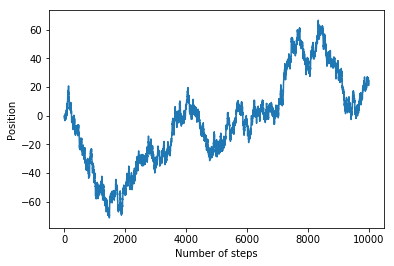

In [13]:
# random walk

rw=[0]*N;

rw[0]=gauss[0];

for i in range(N-1):
    rw[i+1]=rw[i]+gauss[i+1]

plt.plot(rw)
plt.xlabel("Number of steps")
plt.ylabel("Position")

Text(0, 0.5, 'Power spectrum')

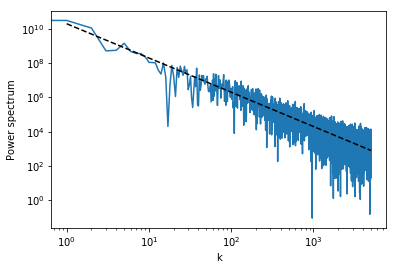

In [16]:
# power spectrum for random walk
spec = Powerspectrum(rw,N)
    
plt.loglog(spec)
h=np.logspace(0,3.7,100)
y1=[0]*len(h)
for i in range(0,len(h)):
    y1[i]=(h[i]**-2)*2e10
plt.loglog(h,y1,'--', color='black')
plt.xlabel("k")
plt.ylabel("Power spectrum")

In [ ]:
"""End of the HW"""

In [267]:
#previous backup
size = 5
lattice = np.zeros((size,size))
T = 10
for i in range(1000):
    xa = np.random.randint(1,size-1)
    ya = np.random.randint(1,size-1)
    rx = np.random.randint(-1,2)
    ry = np.random.randint(-1,2)
    p = random()
    if rx != 0 or ry != 0:
        if lattice[xa][ya] == 0 and lattice[xa+rx][ya+ry]==0:
            lattice[xa][ya]=i
            lattice[xa+rx][ya+ry]=i
        elif p < exp(-1/T): 
            if lattice[xa][ya] != 0 and lattice[xa+rx][ya+ry]==0:
                for k1 in range(-1,2):
                    for k2 in range(-1,2): 
                        if xa+k1 >= size or ya+k2 >=size or (k2==0 and k1==0):
                            continue
                        else:                                                        
                            if lattice[xa][ya] == lattice[xa+k1][ya+k2]:
                                cx = k1
                                cy = k2
                                #print("1")
                lattice[xa][ya]= i 
                lattice[xa+rx][ya+ry]=i
                lattice[xa+cx][ya+cy] = 0
            elif lattice[xa][ya] == 0 and lattice[xa+rx][ya+ry]!=0:
                for k1 in range(-1,2):
                    for k2 in range(-1,2): 
                        if xa+rx+k1 >= size or ya+ry+k2 >=size or (k2==0 and k1==0):
                            continue
                        else:                                                        
                            if lattice[xa+rx][ya+ry] == lattice[xa+rx+k1][ya+ry+k2]:
                                cx = k1
                                cy = k2
                                #print("1")
                lattice[xa][ya]= i 
                lattice[xa+rx][ya+ry]=i
                lattice[xa+rx+cx][ya+ry+cy] = 0